In [1]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import healpy as hp

# Crops Maps of England (CROME) crop data

The dataset contains approximately 32 million hexagonal cells classifying England into over 15 main crop types, grassland, and non-agricultural land covers, such as Woodland, Water Bodies, Fallow Land and other non-agricultural land covers.
The classification was created automatically using supervised classification (Random Forest Classification) from the combination of Sentinel-1 Radar and Sentinel-2 Optical Satellite images


To get the data select an area of interest from https://environment.data.gov.uk/dataset/7fdb6312-801c-41f6-996d-4585d2bb4684. 
Clicking on each county leads to a map tool with an option to download the full data set on geodatabase .gdb format.

In this notebook we plot the positions and crop types within the historic county of Yorkshire by selecting the following areas:

- East Riding of Yorkshire
- North Yorkshire
- South Yorkshire
- West Yorkshire

To obtain the Yorkshire county boundaries we use Boundary-Lane data from the Ordnance Survey Data Hub https://osdatahub.os.uk/downloads/open/BoundaryLine, which can be accessed for free by selecting the GeoPackage data format, and extracting the `bdline_gb.gpkg` file.


Then, a CSV file containing positions, area, and crop types is generated and saved for use in the package.

In [2]:
year = 2020

border_file = '../../data/land/bdline_gb.gpkg' 
crop_file_ERY = f'../../data/land/CROME/RPA_CropMapOfEngland{year}ERY_FGDB_Full/data.gdb'
crop_file_NYO = f'../../data/land/CROME/RPA_CropMapOfEngland{year}NYO_FGDB_Full/data.gdb'
crop_file_SYO = f'../../data/land/CROME/RPA_CropMapOfEngland{year}SYO_FGDB_Full/data.gdb'
crop_file_WYR = f'../../data/land/CROME/RPA_CropMapOfEngland{year}WYR_FGDB_Full/data.gdb'

crop_files = [crop_file_ERY, crop_file_NYO, crop_file_SYO, crop_file_WYR]

In [3]:
# Yorkshire = 66
counties = gpd.read_file(border_file, layer='boundary_line_historic_counties')
polygon = counties['geometry'].iloc[66]
counties

,Name,Area_Description,geometry
0,Berkshire,Historic County,"MULTIPOLYGON (((422004.502 199086.601, 422030...."
1,Buckinghamshire,Historic County,"MULTIPOLYGON (((460619.899 235588.003, 460625...."
2,Hertfordshire,Historic County,"MULTIPOLYGON (((499772.602 215220.503, 499795...."
3,Herefordshire,Historic County,"MULTIPOLYGON (((335069.501 272770.499, 335082...."
4,Oxfordshire,Historic County,"MULTIPOLYGON (((424473.304 224921.896, 424502...."
...,...,...,...
90,Warwickshire,Historic County,"MULTIPOLYGON (((456472.501 274014.303, 456299...."
91,Dorset,Historic County,"MULTIPOLYGON (((333203.198 91375.703, 333185.9..."
92,Devon,Historic County,"MULTIPOLYGON (((333223.945 91353.145, 333218.0..."
93,Banffshire,Historic County,"MULTIPOLYGON (((349516.703 868874.397, 349519...."


In [4]:
city_dict = {'Leeds' : [53.799722, -1.549167],
            'Sheffield' : [53.38297, -1.4659],
            'Bradford' : [53.8, -1.75],
            'Kingston upon Hull' : [53.744444, -0.3325],
            'York' : [53.958333, -1.080278],
            'Huddersfield' : [53.644811, -1.782137],
            'Middlesbrough' : [54.576397, -1.235758],}

In [5]:
# crops = gpd.read_file(crop_file, mask = polygon)

crops = gpd.read_file(crop_files[0])

for file in crop_files[1:]:    
    crops = crops.append(gpd.read_file(file))

# crops_ERY = gpd.read_file(crop_file_ERY)
# crops_NYO = gpd.read_file(crop_file_NYO)
# crops_SYO = gpd.read_file(crop_file_SYO)
# crops_WYR = gpd.read_file(crop_file_WYR)
# crops_ERY['geometry'] = crops_ERY['geometry'].centroid
# crops_NYO['geometry'] = crops_NYO['geometry'].centroid
# crops_SYO['geometry'] = crops_SYO['geometry'].centroid
# crops_WYR['geometry'] = crops_WYR['geometry'].centroid

crops['geometry'] = crops['geometry'].centroid

# crops = crops_ERY.append(crops_NYO)
# crops = crops.append(crops_SYO)
# crops = crops.append(crops_WYR)
crops = crops.drop(colums = ['county', 'cromeid', 'Shape_Length'])

,prob,county,cromeid,lucode,Shape_Length,Shape_Area,geometry
0,0.412,ERY,RPA517846452711,AC19,239.998561,4156.872,POINT (517846.313 452711.826)
1,0.580,ERY,RPA474346428221,NA01,239.998561,4156.872,POINT (474346.313 428220.611)
2,0.460,ERY,RPA523306425588,LG03,239.998561,4156.872,POINT (523306.313 425587.892)
3,0.624,ERY,RPA477646446892,WO12,239.998561,4156.872,POINT (477646.313 446892.111)
4,0.128,ERY,RPA470446433174,PG01,239.998908,4156.884,POINT (470446.313 433174.295)
...,...,...,...,...,...,...,...
488349,0.830,WYR,RPA394606423890,WO12,239.998561,4156.872,POINT (394606.313 423890.486)
488350,0.188,WYR,RPA411466405427,LG14,239.998561,4156.872,POINT (411466.313 405426.826)
488351,0.716,WYR,RPA449746415057,AC03,239.998561,4156.872,POINT (449746.313 415057.017)
488352,0.362,WYR,RPA416986434872,WO12,239.998561,4156.872,POINT (416986.313 434871.701)


In [6]:
lucode_dict = {
"AC01" : "Spring Barley",
"AC03" : "Beet",
"AC04" : "Borage",
"AC05" : "Buckwheat",
"AC06" : "Canary Seed",
"AC07" : "Carrot",
"AC09" : "Chicory",
"AC10" : "Daffodil",
"AC14" : "Hemp",
"AC15" : "Lettuce",
"AC16" : "Spring Linseed ",
"AC17" : "Maize",
"AC18" : "Millet",
"AC19" : "Spring Oats",
"AC20" : "Onions",
"AC22" : "Parsley",
"AC23" : "Parsnips",
"AC24" : "Spring Rye",
"AC26" : "Spinach",
"AC27" : "Strawberry",
"AC30" : "Spring Triticale",
"AC32" : "Spring Wheat",
"AC34" : "Spring Cabbage",
"AC35" : "Turnip",
"AC36" : "Spring Oilseed",
"AC37" : "Brown Mustard",
"AC38" : "Mustard",
"AC41" : "Radish",
"AC44" : "Potato",
"AC45" : "Tomato",
"AC50" : "Squash",
"AC52" : "Siam Pumpkin",
"AC58" : "Mixed Crop-Group 1",
"AC59" : "Mixed Crop-Group 2",
"AC60" : "Mixed Crop-Group 3",
"AC61" : "Mixed Crop-Group 4",
"AC62" : "Mixed Crop-Group 5",
"AC63" : "Winter Barley",
"AC64" : "Winter Linseed",
"AC65" : "Winter Oats",
"AC66" : "Winter Wheat",
"AC67" : "Winter Oilseed",
"AC68" : "Winter Rye",
"AC69" : "Winter Triticale",
"AC70" : "Winter Cabbage",
"AC71" : "Coriander",
"AC72" : "Corn gromwell",
"AC74" : "Phacelia",
"AC81" : "Poppy",
"AC88" : "Sunflower",
"AC90" : "Gladioli",
"AC92" : "Sorghum",
"AC94" : "Sweet William",
"AC100" : "Italian Ryegrass",
"CA02" : "Cover Crop",
"LG01" : "Chickpea",
"LG02" : "Fenugreek",
"LG03" : "Spring Field beans",
"LG04" : "Green Beans",
"LG06" : "Lupins",
"LG07" : "Spring Peas",
"LG09" : "Cowpea",
"LG08" : "Soya",
"LG11" : "Lucerne",
"LG13" : "Sainfoin",
"LG14" : "Clover",
"LG15" : "Mixed Crops–Group 1 Leguminous",
"LG16" : "Mixed Crops–Group 2 Leguminous",
"LG20" : "Winter Field beans",
"LG21" : "Winter Peas",
"SR01" : "Short Rotation Coppice",
"FA01" : "Fallow Land",
"HE02" : "Heathland and Bracken",
"HEAT" : "Heather",
"PG01" : "Grass",
"NA01" : "Non-vegetated or sparsely-vegetated Land",
"WA01" : "Water",
"TC01" : "Perennial Crops and Isolated Trees",
"NU01" : "Nursery Crops",
"WO12" : "Trees and Scrubs, short Woody plants, hedgerows",
"AC00" : "Unknown or Mixed Vegetation"
}

In [7]:
crops['crop'] = ''
crops['crop_group'] = ''
for key in lucode_dict:
    crops.loc[crops['lucode'] == key,'crop'] = lucode_dict[key]
    if key.startswith('AC'):
        crops.loc[crops['lucode'] == key,'crop_group'] = 'Cereal Crops'
    elif key.startswith('LG'):
        crops.loc[crops['lucode'] == key,'crop_group'] = 'Leguminous Crops'
    else:
        crops.loc[crops['lucode'] == key,'crop_group'] = 'Others'
        
crops

,prob,county,cromeid,lucode,Shape_Length,Shape_Area,geometry,crop,crop_group
0,0.412,ERY,RPA517846452711,AC19,239.998561,4156.872,POINT (517846.313 452711.826),Spring Oats,Cereal Crops
1,0.580,ERY,RPA474346428221,NA01,239.998561,4156.872,POINT (474346.313 428220.611),Non-vegetated or sparsely-vegetated Land,Others
2,0.460,ERY,RPA523306425588,LG03,239.998561,4156.872,POINT (523306.313 425587.892),Spring Field beans,Leguminous Crops
3,0.624,ERY,RPA477646446892,WO12,239.998561,4156.872,POINT (477646.313 446892.111),"Trees and Scrubs, short Woody plants, hedgerows",Others
4,0.128,ERY,RPA470446433174,PG01,239.998908,4156.884,POINT (470446.313 433174.295),Grass,Others
...,...,...,...,...,...,...,...,...,...
488349,0.830,WYR,RPA394606423890,WO12,239.998561,4156.872,POINT (394606.313 423890.486),"Trees and Scrubs, short Woody plants, hedgerows",Others
488350,0.188,WYR,RPA411466405427,LG14,239.998561,4156.872,POINT (411466.313 405426.826),Clover,Leguminous Crops
488351,0.716,WYR,RPA449746415057,AC03,239.998561,4156.872,POINT (449746.313 415057.017),Beet,Cereal Crops
488352,0.362,WYR,RPA416986434872,WO12,239.998561,4156.872,POINT (416986.313 434871.701),"Trees and Scrubs, short Woody plants, hedgerows",Others


In [8]:
print(crops.crs)

crops = crops.to_crs(epsg=4326)
counties = counties.to_crs(epsg=4326)

print(crops.crs)

epsg:27700
epsg:4326


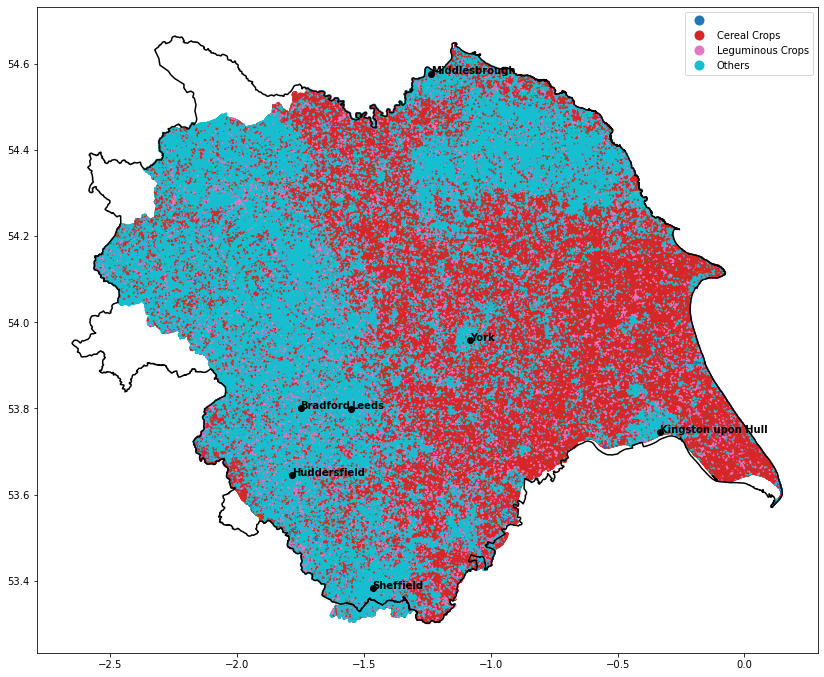

In [9]:
base = counties.iloc[66:67].boundary.plot(color = 'k', figsize = (14,14))
crops.plot('crop_group', ax=base, legend=True, markersize = 1)
# crops.plot('lucode', legend=True, markersize = 1)

for key in city_dict.keys():
    lat, lon = city_dict[key]
    plt.text(lon, lat, key, fontweight= 'bold')
    plt.plot(lon, lat, 'ko')

# plt.xlim(-3,0.25);